<a href="https://colab.research.google.com/github/hridayshah7/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pan
import numpy as num
import matplotlib.pyplot as plot
import seaborn as sea
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
def load_file():
    try:
        dataframe = pan.read_csv("/content/diabetes.csv")
        return dataframe
    except FileNotFoundError:
        print("Make sure you have file in this directory !")
        return None
    except Exception as e :
        print(f"Error : {str(e)}")
        return None

dataframe = load_file()

In [ ]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataframe.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN
dataframe[zero_columns] = dataframe[zero_columns].replace(0, num.nan)

print(dataframe.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
dataframe.fillna(dataframe.median(), inplace=True)

In [ ]:
print(dataframe.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
dataframe.duplicated().sum()

np.int64(0)

In [ ]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


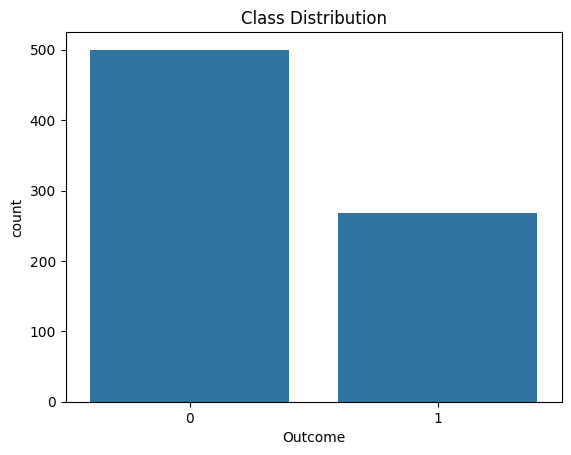

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [ ]:
sea.countplot(x='Outcome', data=dataframe)
plot.title('Class Distribution')
plot.show()

print(dataframe['Outcome'].value_counts(normalize=True) * 100)

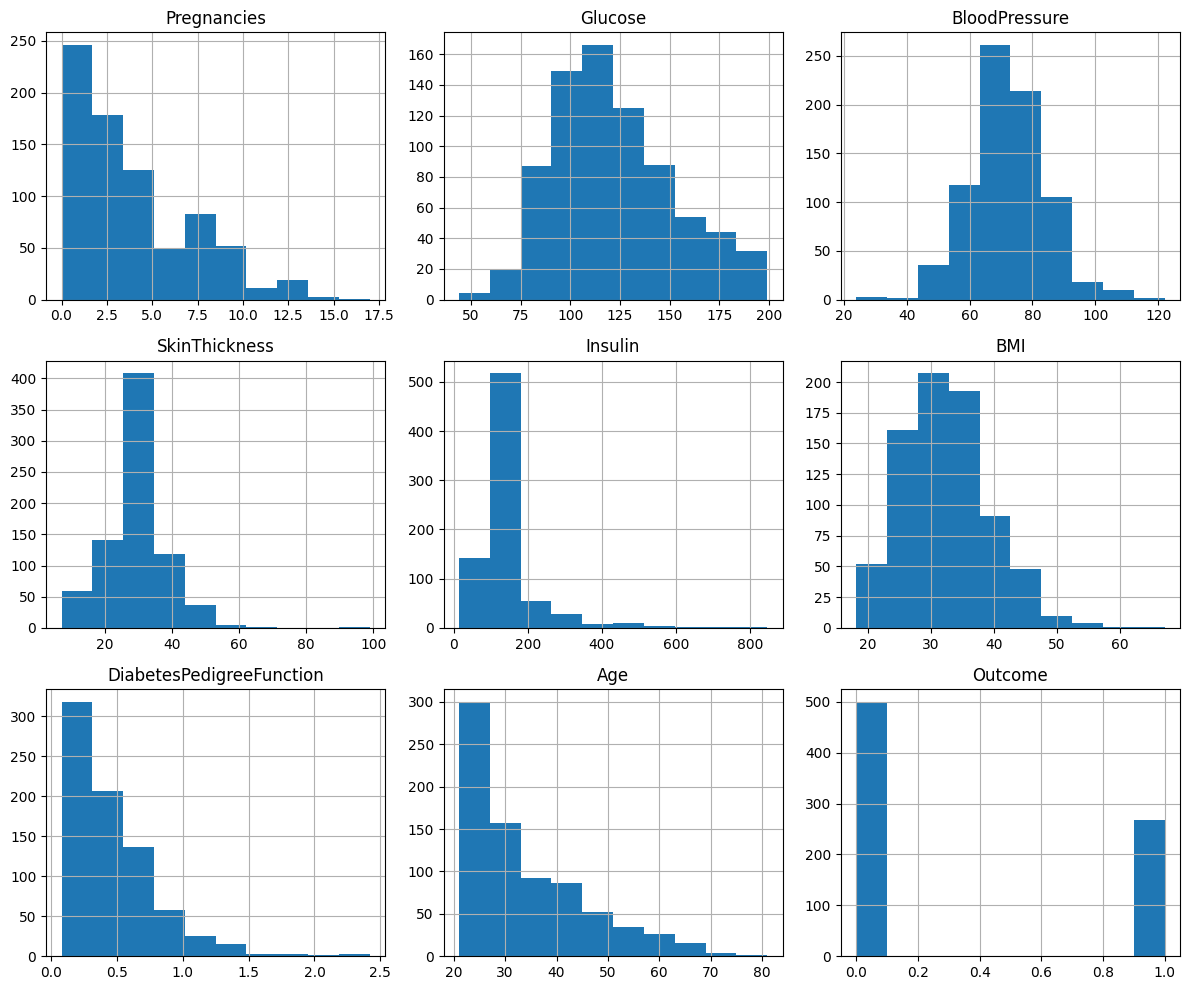

In [ ]:
# Histograms for all features
dataframe.hist(figsize=(12, 10),bins=10)
plot.tight_layout()
plot.show()

# Correlation matrix

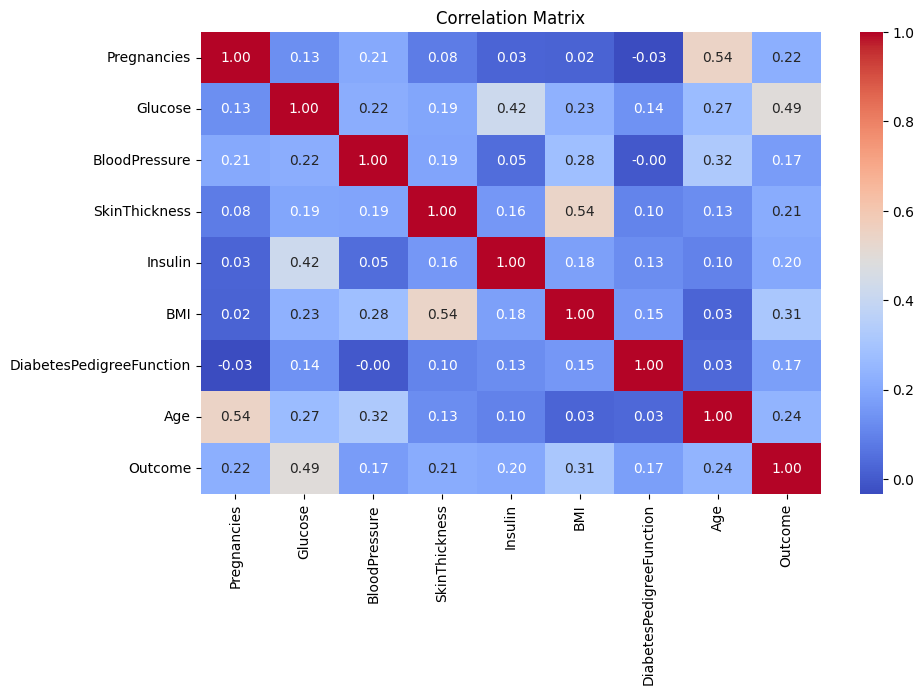

In [ ]:
plot.figure(figsize=(10, 6))
sea.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plot.title('Correlation Matrix')
plot.show()

In [ ]:
dataframe["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
diabetic = dataframe[dataframe["Outcome"] == 1]
non_diabetic = dataframe[dataframe["Outcome"] == 0]

non_diabetic_downsampled = non_diabetic.sample(n=len(diabetic), random_state=42)

dataframe_balanced = pan.concat([diabetic, non_diabetic_downsampled])

print("\nBalanced Class Distribution (Downsampling):")
print(dataframe_balanced['Outcome'].value_counts())


Balanced Class Distribution (Downsampling):
Outcome
1    268
0    268
Name: count, dtype: int64


In [ ]:
dataframe_balanced["Outcome"].value_counts()

,count
Outcome,
1,268
0,268


In [ ]:
dataframe_balanced = dataframe_balanced.drop(columns=["DiabetesPedigreeFunction", "Insulin", "BloodPressure"])

# Heatmap with correlations

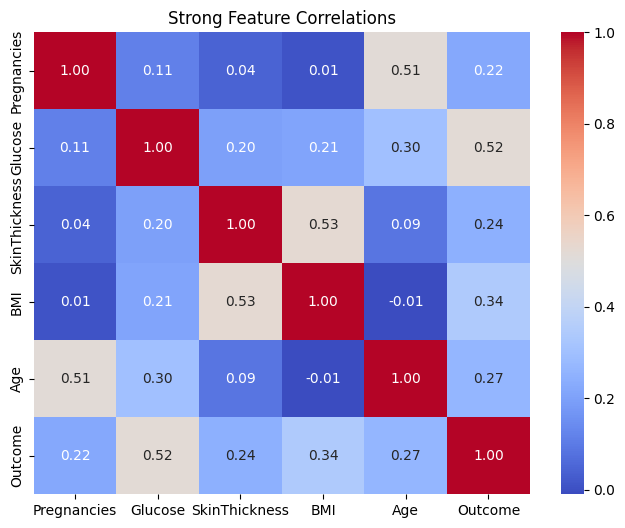

In [ ]:
plot.figure(figsize=(8, 6))
sea.heatmap(dataframe_balanced.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plot.title('Strong Feature Correlations')
plot.show()

# Features (X) and target (y)

In [ ]:
X = dataframe_balanced.drop("Outcome", axis=1)  # All columns except 'Outcome'
y = dataframe_balanced["Outcome"]

# Split the data (80% training, 20% testing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (428, 5)
Testing set size: (108, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

# Train the SVM with a linear kernel

In [ ]:
model_linear = SVC(kernel='linear', class_weight= 'balanced', random_state=42)
model_linear.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

# Train the SVM with an RBF (non-linear) kernel

In [ ]:
model_rbf = SVC(kernel='rbf',class_weight= 'balanced', random_state=42)
model_rbf.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=42)

# Make predictions and evaluate the models (SVM)

In [ ]:
y_pred_linear = model_linear.predict(X_test_scaled)
y_pred_rbf = model_rbf.predict(X_test_scaled)

# Comparing the performance of both models

In [ ]:
print("Linear SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))
print("==================================================")
print("\nRBF (Non-linear) SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

Linear SVM Performance:
Accuracy: 0.8240740740740741
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        49
           1       0.92      0.75      0.82        59

    accuracy                           0.82       108
   macro avg       0.83      0.83      0.82       108
weighted avg       0.84      0.82      0.82       108


RBF (Non-linear) SVM Performance:
Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        49
           1       0.88      0.76      0.82        59

    accuracy                           0.81       108
   macro avg       0.82      0.82      0.81       108
weighted avg       0.82      0.81      0.82       108



In [ ]:
y_train_pred = model_linear.predict(X_train_scaled)
train_score = accuracy_score(y_train, y_train_pred)

y_test_pred = model_linear.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_test_pred)

print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")


Training Score: 0.7313
Testing Score: 0.8241


# Create and train a logistic regression model

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        49
           1       0.90      0.78      0.84        59

    accuracy                           0.83       108
   macro avg       0.84      0.84      0.83       108
weighted avg       0.84      0.83      0.83       108

AUC-ROC score: 0.9024558976132826


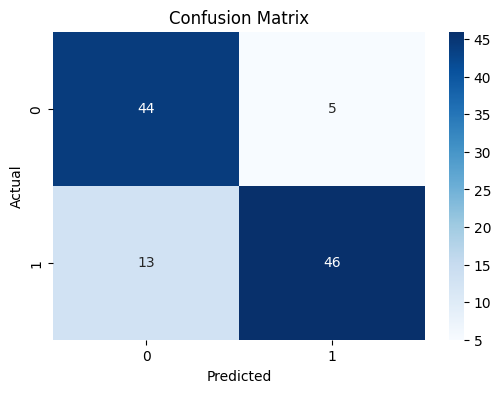

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sea
import matplotlib.pyplot as plot

log_reg = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

roc_auc = roc_auc_score(y_test, y_pred_prob_log_reg[:, 1])
print(f"AUC-ROC score: {roc_auc}")

conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

plot.figure(figsize=(6, 4))
sea.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plot.title('Confusion Matrix')
plot.xlabel('Predicted')
plot.ylabel('Actual')
plot.show()


In [ ]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

y_train_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

train_results = pan.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Probability': y_train_prob})
test_results = pan.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Probability': y_test_prob})

print("\nTraining Data Predictions:")
print(train_results.head())
print("=="*20)
print("\nTesting Data Predictions:")
print(test_results.head())


Training Data Predictions:
     Actual  Predicted  Probability
711       0          0     0.458504
747       0          0     0.378487
35        0          0     0.142610
394       1          1     0.754690
542       1          0     0.482956

Testing Data Predictions:
     Actual  Predicted  Probability
306       1          1     0.788897
339       1          1     0.957573
404       1          1     0.857006
709       1          0     0.251825
220       1          1     0.802991


In [ ]:
print("Value count of 0 and 1 in Training set.")
print(y_train.value_counts())
print("=="*25)
print("Value count of 0 and 1 in Testing set.")
print(y_test.value_counts())

Value count of 0 and 1 in Training set.
Outcome
0    219
1    209
Name: count, dtype: int64
Value count of 0 and 1 in Testing set.
Outcome
1    59
0    49
Name: count, dtype: int64


In [ ]:
print(f"Training Accuracy: {log_reg.score(X_train_scaled, y_train):.2f}")
print(f"Testing Accuracy: {log_reg.score(X_test_scaled, y_test):.2f}")


Training Accuracy: 0.73
Testing Accuracy: 0.83


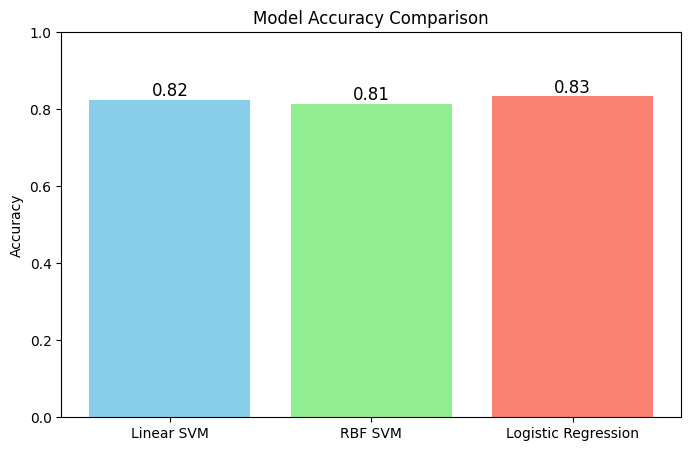

In [ ]:
import matplotlib.pyplot as plot

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

models = ['Linear SVM', 'RBF SVM', 'Logistic Regression']
accuracies = [accuracy_linear, accuracy_rbf, accuracy_log_reg]

plot.figure(figsize=(8, 5))
plot.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plot.ylim(0, 1)
plot.ylabel('Accuracy')
plot.title('Model Accuracy Comparison')
for i, acc in enumerate(accuracies):
    plot.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plot.show()


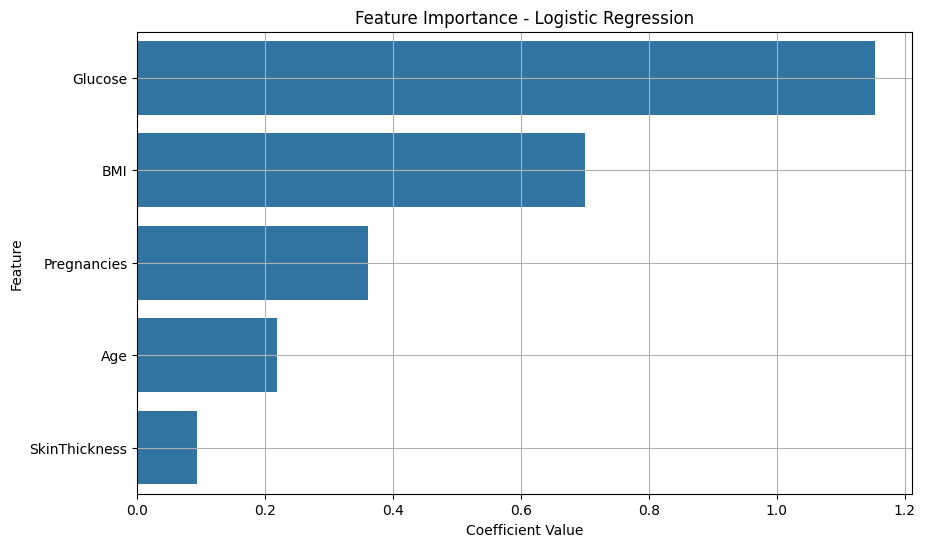

In [ ]:
import pandas as pan
import seaborn as sea

importance = pan.Series(log_reg.coef_[0], index=X.columns)
importance = importance.sort_values(ascending=False)

plot.figure(figsize=(10, 6))
sea.barplot(x=importance, y=importance.index)
plot.title('Feature Importance - Logistic Regression')
plot.xlabel('Coefficient Value')
plot.ylabel('Feature')
plot.grid(True)
plot.show()


In [ ]:
import joblib

joblib.dump(model_linear, 'linear_svm_model.pkl')

joblib.dump(log_reg, 'logreg_model.pkl')

['logreg_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']